# Dataset

In [162]:
# Predict Bitcoin price for next 30 days

In [345]:
#import libraries
import numpy as dragon
from binance.client import Client
import datetime
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import deque
import random
import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
from sklearn import preprocessing

In [216]:
#using API to get recent data from Binance
api_key='kikMm5wCFBWPs8i6apOEPBopkfCMDFqhWaonzOrFjtUyZoVb0Zimj2KN5k3JN4L3'
api_secret='7oRcw5SiuSYSVUXWELkKZomLQ6UQFfAsuYWxOVbmnKTulxUxZMCUCtmQ0RwlWW42'
client = Client(api_key, api_secret)

In [217]:
# #Fetchinf Bitcoin Dataset
# symbol='BCHUSDT'
# BCH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")
# symbol='ETHBTC'
# ETH=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")

In [218]:
#Fetchinf Bitcoin Dataset
symbol='BTCUSDT'
BTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")
symbol='LTCBTC'
LTC=client.get_historical_klines(symbol=symbol,interval=Client.KLINE_INTERVAL_30MINUTE,start_str="1 year ago UTC")

In [219]:
#adding columns to the dataset
BTC=pd.DataFrame(BTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])
LTC=pd.DataFrame(LTC,columns=['Open time','Open','High','Low','Close','Volume','Close time','Quote asset volume','Number of trades','Taker buy base asset volume','Taker buy quote asset volume','Can be ignored'])

In [220]:
#Open time was converted to date-time format from String 
BTC['Open time']=pd.to_datetime(BTC['Open time'],unit='ms')
BTC['Close time']=pd.to_datetime(BTC['Close time'],unit='ms')
LTC['Open time']=pd.to_datetime(LTC['Open time'],unit='ms')
LTC['Close time']=pd.to_datetime(LTC['Close time'],unit='ms')

In [221]:
print(BTC.columns)

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Can be ignored'],
      dtype='object')


In [222]:
print("Shape of the dataset:",BTC.shape)
print("Shape of the dataset:",LTC.shape)

Shape of the dataset: (17501, 12)
Shape of the dataset: (17501, 12)


In [276]:
print("BTC Datatypes:",BTC.dtypes)
print("LTC Datatypes:",LTC.dtypes)

BTC Datatypes: Open time                       datetime64[ns]
Open                                    object
High                                    object
Low                                     object
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote asset volume                      object
Number of trades                         int64
Taker buy base asset volume             object
Taker buy quote asset volume            object
Can be ignored                          object
dtype: object
LTC Datatypes: Open time                       datetime64[ns]
Open                                    object
High                                    object
Low                                     object
Close                                  float64
Volume                                 float64
Close time                      datetime64[ns]
Quote asset volume                      object
Number of trades

In [224]:
#making Open time as index
# BTC.set_index('Open time',inplace=True)
# LTC.set_index('Open time',inplace=True)

In [225]:
#converting Close prices to float from String
#The Close column measures the final price at the end of each interval
BTC['Close']=BTC['Close'].astype(float)
BTC['Volume']=BTC['Volume'].astype(float)
LTC['Close']=LTC['Close'].astype(float)
LTC['Volume']=LTC['Volume'].astype(float)

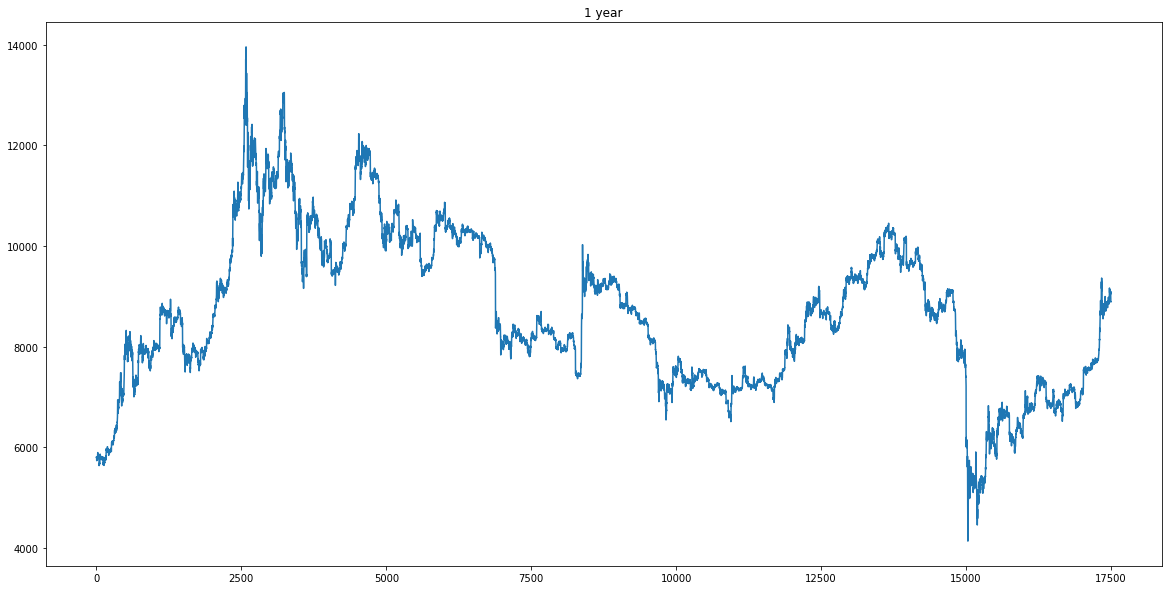

In [174]:
BTC['Close'].plot(figsize=(20,10),title='1 year')

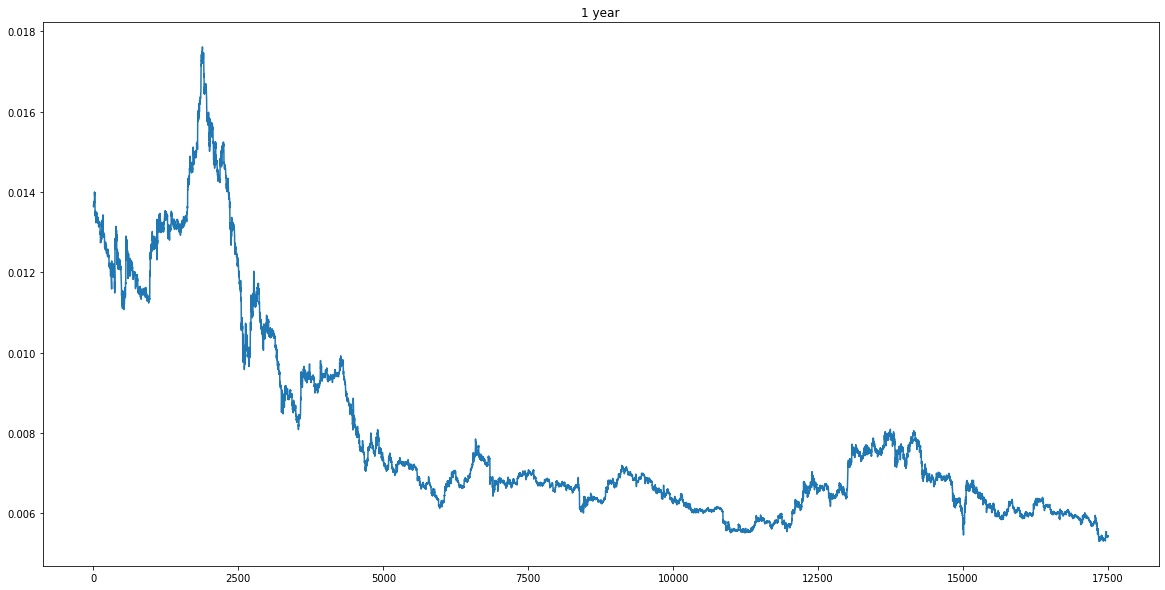

In [175]:
LTC['Close'].plot(figsize=(20,10),title='1 year')

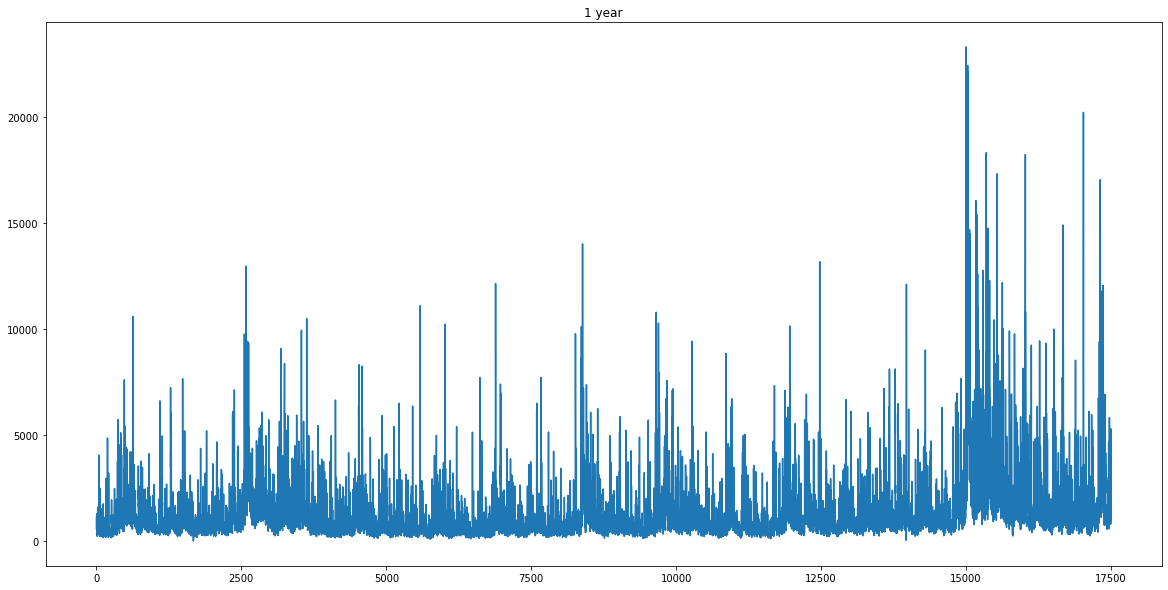

In [176]:
BTC['Volume'].plot(figsize=(20,10),title='1 year')

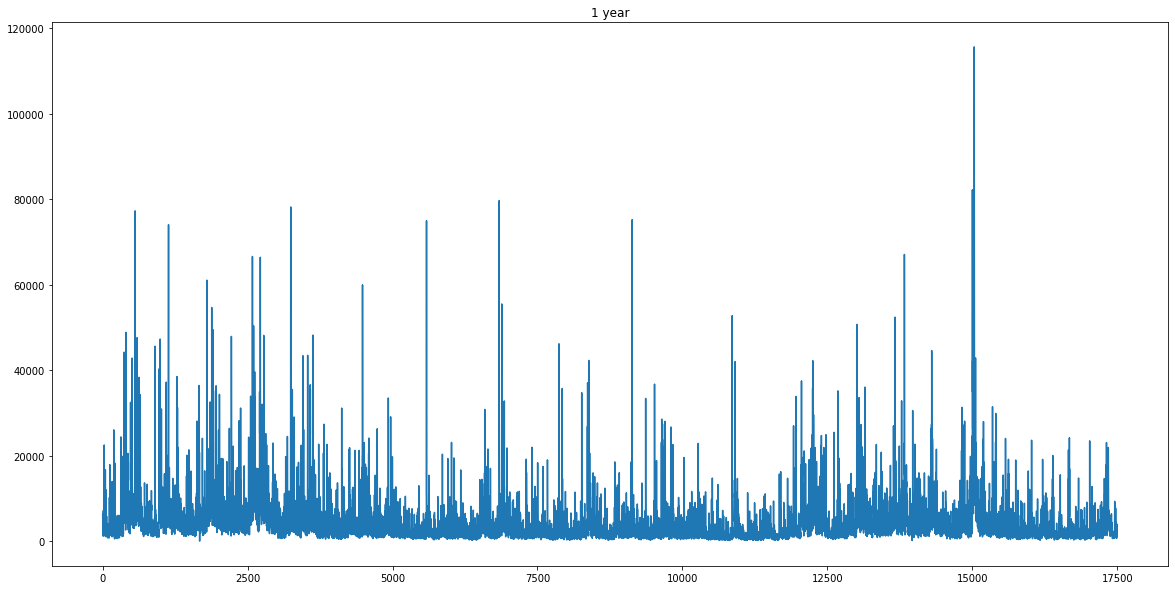

In [177]:
LTC['Volume'].plot(figsize=(20,10),title='1 year')

In [178]:
print("BTC statistics:",BTC.describe())
print("LTC statistics:",LTC.describe())

BTC statistics:               Close        Volume  Number of trades
count  17501.000000  17501.000000      17501.000000
mean    8657.068709   1222.795801      10869.482944
std     1547.927610   1388.697205       8943.061447
min     4130.640000      0.000000          0.000000
25%     7427.740000    502.955567       5803.000000
50%     8555.670000    808.206996       8331.000000
75%     9819.490000   1382.871664      12615.000000
max    13960.760000  23284.136444     144172.000000
LTC statistics:               Close         Volume  Number of trades
count  17501.000000   17501.000000      17501.000000
mean       0.007906    4039.412582        963.972116
std        0.002552    5362.587395       1245.443944
min        0.005301       0.000000          0.000000
25%        0.006270    1363.500000        325.000000
50%        0.006827    2434.250000        576.000000
75%        0.008486    4665.300000       1116.000000
max        0.017615  115626.760000      22459.000000


In [227]:
LTC.isnull().any()
#BTC.isnull().any()

Open time                       False
Open                            False
High                            False
Low                             False
Close                           False
Volume                          False
Close time                      False
Quote asset volume              False
Number of trades                False
Taker buy base asset volume     False
Taker buy quote asset volume    False
Can be ignored                  False
dtype: bool

In [180]:
# The reason why log-scale is used on y-axis is that it reveals the percentile change

# Case 1) when price goes up from $ 10-$ 15: change(increase) is $5. Increase rate is 50%
# Case 2) when price goes up from $20-$25: change(increase) is  $5. Increase rate is 25%
    
# In both cases , change is same but rate of change is different.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


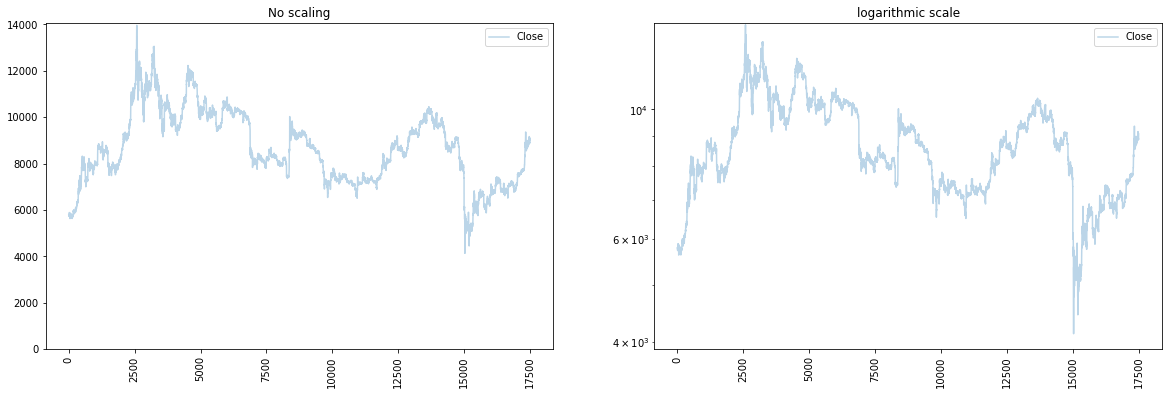

In [181]:
plt.figure(num=None, figsize=(20, 6))
plt.subplot(1,2,1)
ax = BTC['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_ylim(0, np.max(BTC['Close'] + 100))
plt.xticks(rotation=90)
plt.title("No scaling")
ax.legend()
plt.subplot(1,2,2)
ax = BTC['Close'].plot(style=['-'])
ax.lines[0].set_alpha(0.3)
ax.set_yscale('log')
ax.set_ylim(0, np.max(BTC['Close'] + 100))
plt.xticks(rotation=90)
plt.title("logarithmic scale")
ax.legend()

In [182]:
# ['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
#        'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
#        'Taker buy quote asset volume', 'Can be ignored']

In [183]:
main_df = pd.DataFrame() # begin empty

ratios = ["BTC-USD", "LTC-USD"] 
datasets = [BTC,LTC]# the 4 ratios we want to consider
for i in range(len(ratios)):  # begin iteration
    ratio=ratios[i]
    print(ratio)
    df = datasets[i]

    # rename volume and close to include the ticker so we can still which close/volume is which:
    df.rename(columns={"Close": f"{ratio}_Close", "Volume": f"{ratio}_Volume"}, inplace=True)

    df.set_index("Open time", inplace=True)  # set time as index so we can join them on this shared time
    df = df[[f"{ratio}_Close", f"{ratio}_Volume"]]  # ignore the other columns besides price and volume

    if len(main_df)==0:  # if the dataframe is empty
        main_df = df  # then it's just the current df
    else:  # otherwise, join this data to the main one
        main_df = main_df.join(df)

main_df.fillna(method="ffill", inplace=True)  # if there are gaps in data, use previously known values
main_df.dropna(inplace=True)
print(main_df.head(10))  # how did we do??

BTC-USD
LTC-USD
                     BTC-USD_Close  BTC-USD_Volume  LTC-USD_Close  \
Open time                                                           
2019-05-03 14:30:00        5798.76     1084.134117       0.013676   
2019-05-03 15:00:00        5790.39     1047.919613       0.013648   
2019-05-03 15:30:00        5787.00      602.701452       0.013652   
2019-05-03 16:00:00        5802.07      534.536311       0.013629   
2019-05-03 16:30:00        5763.46      741.402688       0.013661   
2019-05-03 17:00:00        5733.68     1296.830571       0.013655   
2019-05-03 17:30:00        5746.28      598.546417       0.013656   
2019-05-03 18:00:00        5732.63      320.772282       0.013710   
2019-05-03 18:30:00        5763.00      566.757491       0.013680   
2019-05-03 19:00:00        5755.93      481.492305       0.013675   

                     LTC-USD_Volume  
Open time                            
2019-05-03 14:30:00         6263.85  
2019-05-03 15:00:00         5262.80  
201

In [188]:
def classify(current, future):
    if float(future) > float(current):
        return 1
    else:
        return 0

In [185]:
SEQ_LEN = 60  # how long of a preceeding sequence to collect for RNN
FUTURE_PERIOD_PREDICT = 1  # how far into the future are we trying to predict?
RATIO_TO_PREDICT = "BTC-USD"

main_df['future'] = main_df[f'{RATIO_TO_PREDICT}_Close'].shift(-FUTURE_PERIOD_PREDICT)

In [186]:
print(main_df[[f'{RATIO_TO_PREDICT}_Close','future']].head())

                     BTC-USD_Close   future
Open time                                  
2019-05-03 14:30:00        5798.76  5790.39
2019-05-03 15:00:00        5790.39  5787.00
2019-05-03 15:30:00        5787.00  5802.07
2019-05-03 16:00:00        5802.07  5763.46
2019-05-03 16:30:00        5763.46  5733.68


In [189]:
main_df['target'] = list(map(classify, main_df[f'{RATIO_TO_PREDICT}_Close'], main_df['future']))

In [190]:
print(main_df[[f'{RATIO_TO_PREDICT}_Close','future','target']].head())

                     BTC-USD_Close   future  target
Open time                                          
2019-05-03 14:30:00        5798.76  5790.39       0
2019-05-03 15:00:00        5790.39  5787.00       0
2019-05-03 15:30:00        5787.00  5802.07       1
2019-05-03 16:00:00        5802.07  5763.46       0
2019-05-03 16:30:00        5763.46  5733.68       0


In [191]:
main_df.tail()

BTC-USD_Close  BTC-USD_Volume  LTC-USD_Close  \
Open time                                                           
2020-05-03 12:00:00        8946.50     3232.690998       0.005431   
2020-05-03 12:30:00        8958.85     4138.363496       0.005425   
2020-05-03 13:00:00        8885.27     5292.270347       0.005438   
2020-05-03 13:30:00        8920.82     2211.721730       0.005428   
2020-05-03 14:00:00        8892.35     1225.715841       0.005420   

                     LTC-USD_Volume   future  target  
Open time                                             
2020-05-03 12:00:00         2207.18  8958.85       1  
2020-05-03 12:30:00         3612.92  8885.27       0  
2020-05-03 13:00:00         3924.57  8920.82       1  
2020-05-03 13:30:00         1719.56  8892.35       0  
2020-05-03 14:00:00         2240.77      NaN       0

In [192]:
#train split
#Note: why we take chunk and not random data
times = sorted(main_df.index.values)  # get the times
last_5pct = sorted(main_df.index.values)[-int(0.05*len(times))]  # get the last 5% of the times

validation_main_df = main_df[(main_df.index >= last_5pct)]  # make the validation data where the index is in the last 5%
main_df = main_df[(main_df.index < last_5pct)]  

In [193]:
print(last_5pct)

2020-04-15T06:30:00.000000000


In [194]:
print(validation_main_df.head())

                     BTC-USD_Close  BTC-USD_Volume  LTC-USD_Close  \
Open time                                                           
2020-04-15 06:30:00        6885.26      720.895748       0.006008   
2020-04-15 07:00:00        6869.13     1136.459605       0.006006   
2020-04-15 07:30:00        6862.05      959.770132       0.006015   
2020-04-15 08:00:00        6873.50      802.999703       0.006006   
2020-04-15 08:30:00        6849.77     1227.621649       0.006007   

                     LTC-USD_Volume   future  target  
Open time                                             
2020-04-15 06:30:00         2276.49  6869.13       0  
2020-04-15 07:00:00         1465.04  6862.05       0  
2020-04-15 07:30:00         1468.69  6873.50       1  
2020-04-15 08:00:00         1199.30  6849.77       0  
2020-04-15 08:30:00         1793.03  6839.91       0  


In [195]:
print(main_df.tail())

                     BTC-USD_Close  BTC-USD_Volume  LTC-USD_Close  \
Open time                                                           
2020-04-15 04:00:00        6911.55     1011.629656       0.006005   
2020-04-15 04:30:00        6891.29      744.105009       0.006006   
2020-04-15 05:00:00        6884.03      539.611319       0.006004   
2020-04-15 05:30:00        6906.09      729.721602       0.006017   
2020-04-15 06:00:00        6902.33      845.686612       0.006010   

                     LTC-USD_Volume   future  target  
Open time                                             
2020-04-15 04:00:00         1346.03  6891.29       0  
2020-04-15 04:30:00          499.72  6884.03       0  
2020-04-15 05:00:00          762.32  6906.09       1  
2020-04-15 05:30:00         1227.43  6902.33       0  
2020-04-15 06:00:00          847.28  6885.26       0  


In [317]:
def preprocess_df(df):
    df = df.drop("future", 1)  # don't need this anymore.

    for col in df.columns:  # go through all of the columns
        if col != "target":  # normalize all ... except for the target itself!
            df[col] = df[col].pct_change()  # pct change "normalizes" the different currencies (each crypto coin has vastly diff values, we're really more interested in the other coin's movements)
            df = df.replace([np.inf, -np.inf], np.nan)
            df.dropna(inplace=True,axis=0)  # remove the nas created by pct_change
            df[col] = preprocessing.scale(df[col].values)  

    df.dropna(inplace=True)  # cleanup again... jic.


    sequential_data = []  # this is a list that will CONTAIN the sequences
    prev_days = deque(maxlen=SEQ_LEN)  # These will be our actual sequences. They are made with deque, which keeps the maximum length by popping out older values as new ones come in

    for i in df.values:  # iterate over the values
        prev_days.append([n for n in i[:-1]])  # store all but the target
        if len(prev_days) == SEQ_LEN:  # make sure we have 60 sequences!
            sequential_data.append([np.array(prev_days), i[-1]])  # append those bad boys!

    random.shuffle(sequential_data)  # shuffle for good measure.
    X = []
    y = []

    for seq, target in sequential_data:  # going over our new sequential data
        X.append(seq)  # X is the sequences
        y.append(target)  # y is the targets/labels (buys vs sell/notbuy)

    return np.array(X), y  # return X and y...and make X a numpy array!


In [321]:
train_x, train_y = preprocess_df(main_df) 
validation_x, validation_y = preprocess_df(validation_main_df)
print(train_x)

[[[ 0.0222878  -0.06343044  2.33915738  0.00444326]
  [-0.17802631 -0.28703588 -1.03000353 -0.37434719]
  [ 0.63690858 -0.3810684   0.58620138 -0.40631472]
  ...
  [ 0.82546751 -0.21410029 -0.2258729   0.22470904]
  [-0.73321251 -0.56275725  0.44414256 -0.47451072]
  [ 0.70110245 -0.39620103 -0.28378378 -0.6989528 ]]

 [[ 0.0410163   0.04078231 -0.17217663 -0.29653538]
  [ 1.03985326 -0.05240511 -2.14503496 -0.23704351]
  [-1.56152758 -0.45967408  0.70216492 -0.42516614]
  ...
  [-0.81821421 -0.41781813 -0.67478309  0.11584076]
  [ 0.00932875 -0.11388022  0.09623453 -0.07263261]
  [-0.14837614 -0.03809265  0.363794   -0.53249569]]

 [[-0.03282457 -0.3599895  -0.09477869 -0.55982052]
  [ 0.07104394 -0.31307377  0.47248099 -0.35946615]
  [ 0.37543469 -0.13882906  0.12308641  0.04098246]
  ...
  [ 0.40996295 -0.4326762   0.41560544 -0.27907428]
  [-0.34070946 -0.29561669 -0.74055313 -0.42424239]
  [ 0.012139    0.45513465 -0.03393984 -0.18733961]]

 ...

 [[ 0.23129402 -0.05079666  0.9692

# LSTM

In [334]:
import time

EPOCHS = 10  # how many passes through our data
BATCH_SIZE = 64  # how many batches? Try smaller batch if you're getting OOM (out of memory) errors.

In [335]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passi

In [353]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True,input_shape=(train_x.shape[1],4)))
regressor.add(Dropout(0.25))
#second RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#third RNN layer
regressor.add(SimpleRNN(512,activation="relu",return_sequences=True))
regressor.add(Dropout(0.35))
#fourth RNN layer
regressor.add(SimpleRNN(256,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#fifth RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True))
regressor.add(Dropout(0.25))
#convert the matrix to 1-line
regressor.add(Flatten())
#output layer
regressor.add(Dense(1))

regressor.compile(optimizer="adam",loss="mean_squared_error")
regressor.fit(train_x,train_y,epochs=5,batch_size=64)

InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNN' used by node cu_dnnlstm/CudnnRNN (defined at <ipython-input-336-a8733ead8067>:2) with these attrs: [seed=0, dropout=0, T=DT_FLOAT, input_mode="linear_input", direction="unidirectional", rnn_mode="lstm", is_training=true, seed2=0]
Registered devices: [CPU]
Registered kernels:
  <no registered kernels>

	 [[node cu_dnnlstm/CudnnRNN (defined at <ipython-input-336-a8733ead8067>:2) ]]

Caused by op 'cu_dnnlstm/CudnnRNN', defined at:
  File "/opt/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 583, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "/opt/anaconda3/lib/python3.7/asyncio/base_events.py", line 538, in run_forever
    self._run_once()
  File "/opt/anaconda3/lib/python3.7/asyncio/base_events.py", line 1782, in _run_once
    handle._run()
  File "/opt/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/opt/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/opt/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 361, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 541, in execute_request
    user_expressions, allow_stdin,
  File "/opt/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 300, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2858, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2886, in _run_cell
    return runner(coro)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3063, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3254, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-336-a8733ead8067>", line 2, in <module>
    model.add(CuDNNLSTM(128, input_shape=(train_x.shape[1:]), return_sequences=True))
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/training/checkpointable/base.py", line 442, in _method_wrapper
    method(self, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py", line 164, in add
    layer(x)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py", line 701, in __call__
    return super(RNN, self).__call__(inputs, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py", line 554, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/cudnn_recurrent.py", line 111, in call
    output, states = self._process_batch(inputs, initial_state)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/cudnn_recurrent.py", line 501, in _process_batch
    is_training=True)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_cudnn_rnn_ops.py", line 142, in cudnn_rnn
    seed2=seed2, is_training=is_training, name=name)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): No OpKernel was registered to support Op 'CudnnRNN' used by node cu_dnnlstm/CudnnRNN (defined at <ipython-input-336-a8733ead8067>:2) with these attrs: [seed=0, dropout=0, T=DT_FLOAT, input_mode="linear_input", direction="unidirectional", rnn_mode="lstm", is_training=true, seed2=0]
Registered devices: [CPU]
Registered kernels:
  <no registered kernels>

	 [[node cu_dnnlstm/CudnnRNN (defined at <ipython-input-336-a8733ead8067>:2) ]]


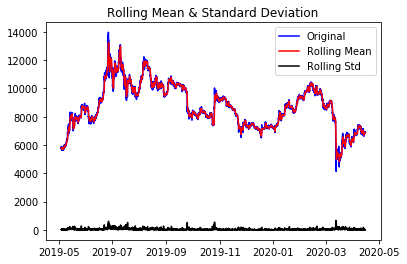

ADF Stastistic: -2.617017
p-value: 0.089531
The graph is non stationery
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [343]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plt.plot(x, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = main_df['BTC-USD_Close']      
test_stationarity(ts)

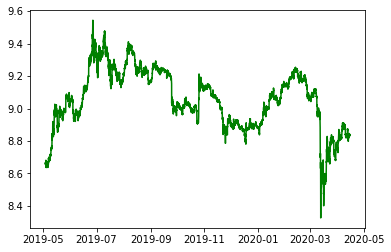

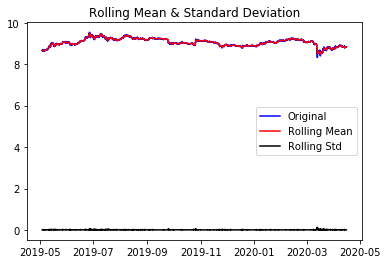

ADF Stastistic: -2.792366
p-value: 0.059373
The graph is non stationery
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [331]:
ts_log = dragon.log(ts)
plt.plot(ts_log,color="green")
plt.show()

test_stationarity(ts_log)

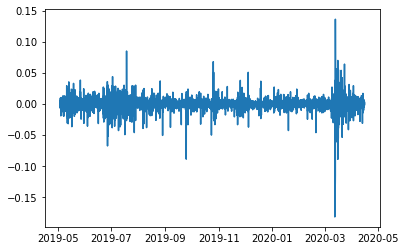

In [332]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

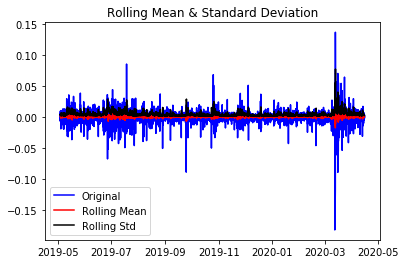

ADF Stastistic: -18.782940
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.431 
	5%: -2.862 
	10%: -2.567 


In [333]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# Gaussian Processes

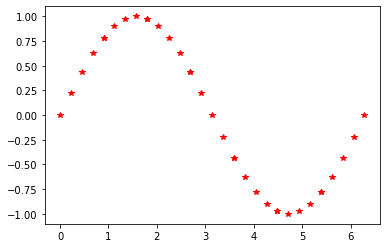

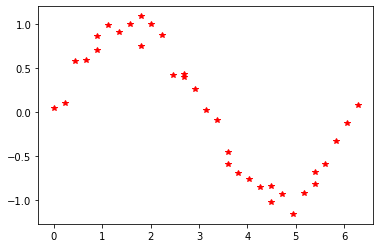

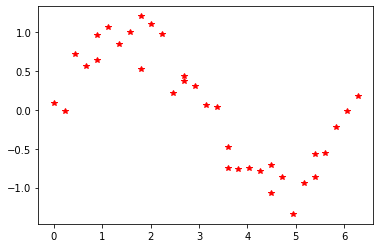

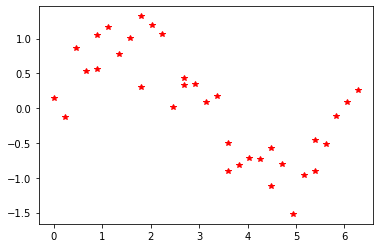

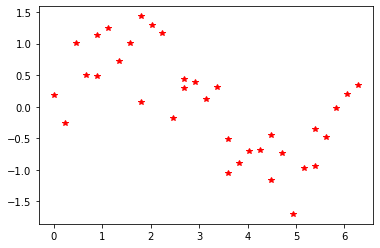

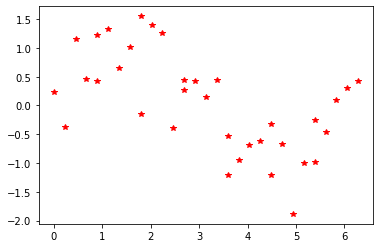

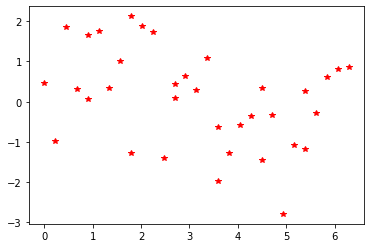

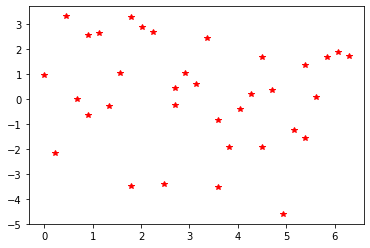

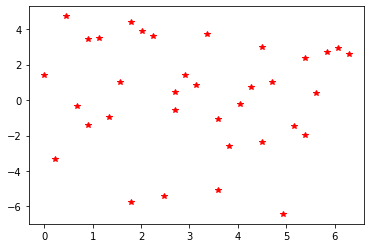

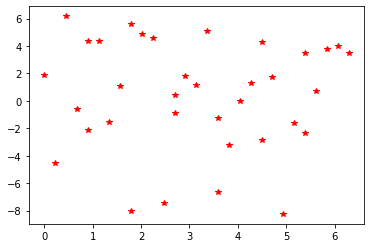

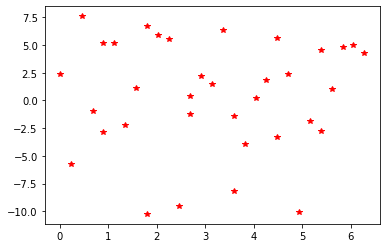

In [247]:

import numpy as np
import matplotlib.pyplot as plt


def generate_points(start, end, section=7, quota=[5, 10], noise=0.1):
    """
    Generate data points from start to end. The data points are generated
    in a number of sections. Odd sections contain the number of points
    given by quota[0]. Even sections contain the number of points given
    by quota[1]. 0-mean Gaussian with variance noise is added into each data point.
    """
    np.random.seed(1234)
    x = []

    section_length = (end - start) / float(section)
    for s in range(section):
        section_start = s * section_length + start
        section_end = (s + 1) * section_length + start

        if s % 2 == 0:
            points = quota[0]
        else:
            points = quota[1]
        x.extend(np.linspace(section_start, section_end, points).tolist())

    x = np.array(x)
    y = np.sin(x) + np.random.normal(scale=noise, size=len(x))

    return x, y


for noise in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5]:
    x, y = generate_points(0, np.pi*2, quota=[5, 5], noise=noise)
    plt.plot(x, y,"r*")
    plt.show()


In [252]:
from sklearn.gaussian_process import GP, SquaredExponentialKernel
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from utils import multiple_formatter

# Set values to model parameters.
lengthscale = 0.1
signal_variance = 10.
noise_variance = 0.1

# Create the GP.
kernel = SquaredExponentialKernel(
    lengthscale=lengthscale, signal_variance=signal_variance)
gp = GP(kernel=kernel, noise_variance=noise_variance)
n = 200
x = np.linspace(0, 2 * np.pi, n)
mean = np.zeros(n)
cov = gp.k(x, x)

# Draw samples from the GP prior.
probabilities = []
samples = []
jitter = np.eye(n) * 1e-6
for _ in range(20):
    y = multivariate_normal.rvs(mean=mean, cov=cov)
    # Add a jitter to the covariance matrix for numerical stability.
    prob = multivariate_normal.pdf(y, mean=mean, cov=cov + jitter)

    samples.append(y)
    probabilities.append(prob)

# Normalize sample probabilities into [0, 1].
probabilities = np.array(probabilities)
min_prob, max_prob = np.min(probabilities), np.max(probabilities)
probabilities = (probabilities - min_prob) / (max_prob - min_prob)

# Plotting.
ax = plt.gca()
for y, prob in zip(samples, probabilities):
    ax.plot(x, y, alpha=prob * 2)

ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 12))
ax.xaxis.set_major_formatter(plt.FuncFormatter(multiple_formatter()))

plt.show()

ImportError: cannot import name 'GP' from 'sklearn.gaussian_process' (/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/__init__.py)